# MNIST Digit Recognition

In [22]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.datasets import mnist

from tensorflow.math import confusion_matrix

# MNIST Dataset

In [23]:
# Loading the dataset 

(X_train, y_train), (X_test, y_test) =  mnist.load_data()

In [24]:
# Shape of the data

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [25]:
# Therefore, there are 60,000 images as training data and 10,100 as test data. Each image has dimensions 28 x 28
# and they are grayscale images and hence have only 1 color channel

In [26]:
# Looking at an image directly from the data set

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

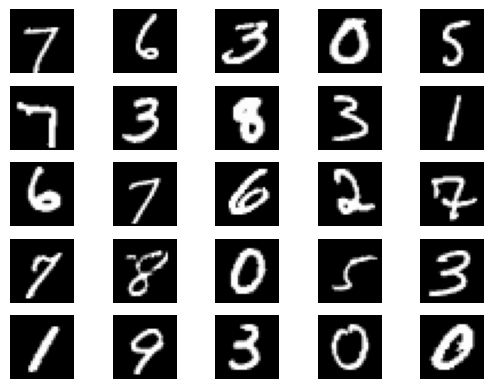

In [27]:
# Visualizing the dataset (25 numbers)

index = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[index]
labels = y_train[index]

for i in range(len(index)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
plt.show()

# One-Hot Encoding

In [28]:
# Converting to a one-hot vector

num_outputs = 10
y_train = to_categorical(y_train, num_outputs)
y_test = to_categorical(y_test, num_outputs)

# Normalization

In [29]:
X_train_scaled = X_train.astype('float32')/ 255
X_test_scaled = X_test.astype('float32')/ 255

In [30]:
# Therefore looking at the scaled version of the 10th image

print(X_train_scaled[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# Building the Neural Network

In [31]:
# Building the model

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(400, activation='relu'),
                          keras.layers.Dense(200, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [32]:
# Compiling the Neural Network

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 895us/step - loss: 0.1916 - accuracy: 0.9422
Epoch 2/10
1875/1875 [==============================] - 2s 817us/step - loss: 0.0812 - accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 2s 818us/step - loss: 0.0568 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 2s 825us/step - loss: 0.0405 - accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 2s 847us/step - loss: 0.0325 - accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 2s 841us/step - loss: 0.0287 - accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 2s 825us/step - loss: 0.0234 - accuracy: 0.9925
Epoch 8/10
1875/1875 [==============================] - 2s 827us/step - loss: 0.0201 - accuracy: 0.9935
Epoch 9/10
1875/1875 [==============================] - 2s 823us/step - loss: 0.0187 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 2s 820u

# Evaluating the model using test data

In [34]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(accuracy)

313/313 [==============================] - 0s 415us/step - loss: 0.0924 - accuracy: 0.9799
0.9799000024795532


# Looking at the predictions

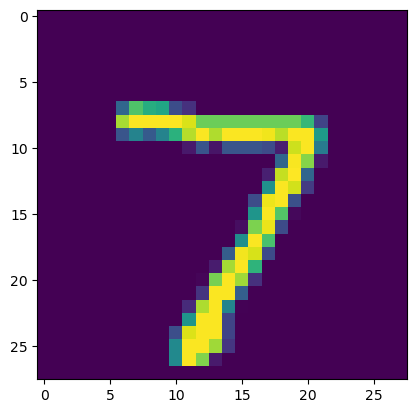

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [35]:
# Looking at first element in test data and its label (one-hot encoded vector)

plt.imshow(X_test_scaled[0])
plt.show()
print(y_test[0])

In [36]:
# Predicting the target values of the test data using the model

y_pred = model.predict(X_test_scaled)

313/313 [==============================] - 0s 405us/step


In [37]:
# y_pred = model.predict() gives the prediction probability of each class for that data point

print(y_pred[0])

[6.5317972e-15 8.5480634e-10 4.1118452e-11 2.6211075e-10 5.5213899e-11
 9.3265857e-13 2.8679000e-17 9.9999988e-01 9.5786105e-12 1.1062386e-07]


In [38]:
# Converting the prediction probabilities to class labels for the test data points

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [39]:
# Converting the one-hot encoded vectors of y_test to class labels for the test data points

y_test_labels = [np.argmax(i) for i in y_test]
print(y_test_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

# Confusion matrix

Text(0.5, 47.7222222222222, 'Predicted Labels')

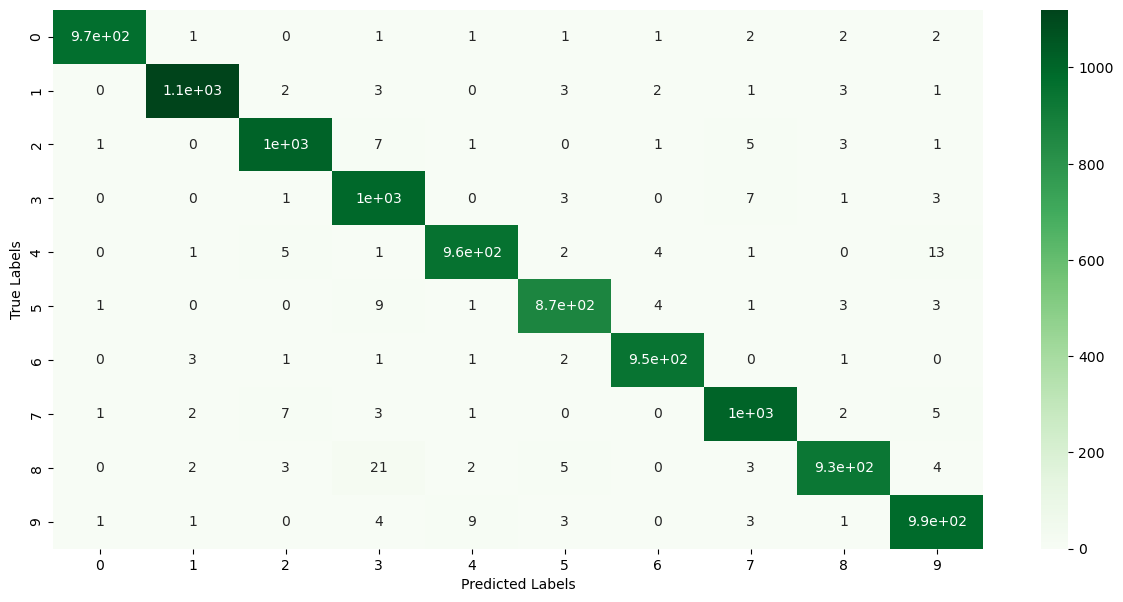

In [40]:
# Confusion matrix as a heatmap

conf_mat = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, cmap='Greens')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

# Inputting an image

Image path name: /Users/shrutidua/Downloads/3.png
1/1 [==============================] - 0s 11ms/step
The Handwritten Digit is recognised as  3


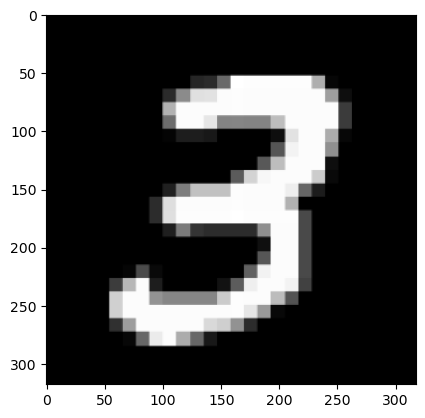

In [41]:
# In this section, I have a downloaded image of a handwritten number 3 and I am using the path name to pass the 
# image through the neural network and predict its label. This code can be used to input any image path name and 
# and pass it through the network for a prediction. The image I am using is - 
# "https://camo.githubusercontent.com/3d9666a8f0c5658667292b74ca19295827c2b22a0e903db283998ae213e6f6e1/68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67"


# Reading the input image 
img_path = input('Image path name: ')
img = cv2.imread(img_path)
# Showing the image
plt.imshow(img)

# Converting the image to grayscale
grayscale_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Resizing the image
img_resize = cv2.resize(grayscale_img, (28, 28))

# Scaling the input image
img_resize = img_resize/255

# Reshaping the image to indicate only a single image is being given to the NN
img_reshaped = np.reshape(img_resize, [1,28,28])

# Input prediction using the model
img_pred = model.predict(img_reshaped)

# Geting the label from the prediction probabilities
img_label = np.argmax(img_pred)

print('The Handwritten Digit is recognised as ', img_label)